### Basic Exploratory Analysis

In [32]:
import pandas as pd
import numpy as np

def load_dataset(file_path):
    """Load the dataset from the specified file path."""
    df = pd.read_csv(file_path)
    return df

def remove_duplicates(df):
    """Remove duplicate rows from the DataFrame."""
    df = df.drop_duplicates()
    return df

def ensure_correct_data_types(df):
    """Ensure the correct data types for each column in the DataFrame."""
    # Example: Convert certain columns to their appropriate types
    df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
    df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
    df['energy_consumption'] = pd.to_numeric(df['energy_consumption'], errors='coerce')
    return df

def show_basic_info(df):
    """Display basic information about the DataFrame."""
    print("\nShape of the DataFrame:")
    display(df.shape)
    
    print("\nFirst few rows of the dataset:")
    display(df.head())
    
    print("\nDescriptive Statistics:")
    display(df.describe())
    
    print("\nDataFrame Info:")
    display(df.info())
    
    print("\nMissing Values:")
    display(df.isnull().sum())

def handle_missing_values(df, threshold=0.1):
    """
    Handle missing values in the DataFrame.
    If the percentage of missing values in any column is below the threshold, drop those rows.
    Otherwise, fill missing values with the median for numeric columns and the mode for categorical columns.
    """
    missing_percentage = df.isnull().mean()
    
    if all(missing_percentage < threshold):
        print(f"\nDropping rows with missing values below {threshold * 100}% threshold.\n")
        df = df.dropna()
    else:
        print(f"\nFilling missing values with median (numeric) and mode (categorical).\n")
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
        
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns
        df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    return df

def detect_outliers(df, column):
    """Detect outliers in a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers detected in {column}:")
        display(outliers)
    else:
        print(f"No outliers detected in {column}.")
    return outliers

def handle_outliers(df, column, method='clipping'):
    """
    Handle outliers in a specified column using various methods.
    Available methods: 'removal', 'transformation', 'imputation', 'clipping'.
    """
    outliers = detect_outliers(df, column)
    
    if not outliers.empty:
        if method == 'removal':
            df = df[(df[column] >= df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))) &
                    (df[column] <= df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))]
            print(f"Removed outliers in {column}.")
        
        elif method == 'transformation':
            df[column] = np.log1p(df[column])
            print(f"Applied logarithmic transformation to {column}.")
        
        elif method == 'imputation':
            median_value = df[column].median()
            df[column] = np.where(df[column].isin(outliers[column]), median_value, df[column])
            print(f"Imputed outliers in {column} with median value.")
        
        elif method == 'clipping':
            lower_bound = df[column].quantile(0.05)
            upper_bound = df[column].quantile(0.95)
            df[column] = np.clip(df[column], lower_bound, upper_bound)
            print(f"Clipped outliers in {column} to the 5th and 95th percentiles.")
    
    return df

def save_dataframe(df, file_name):
    """Save the DataFrame to a CSV file."""
    df.to_csv(file_name, index=False)
    print(f"DataFrame saved to {file_name}")
    
def main():
    # Load the dataset
    file_path = './energy_consumption_data.csv' 
    df = load_dataset(file_path)
    
    # Remove duplicates
    df = remove_duplicates(df)
    
    # Ensure correct data types
    df = ensure_correct_data_types(df)
    
    # Show basic information about the dataset
    show_basic_info(df)
    
    # Handle missing values
    df_filled = handle_missing_values(df)

    # Handle anomalies using Isolation Forest (to prevent skewing in outlier detection)
    # Future Work: add this later
    
    # Handle outliers using the desired method
    for column in ['temperature', 'humidity', 'energy_consumption']:
        df_cleaned = handle_outliers(df_filled, column, method='clipping')
    
    # Display updated DataFrame info after handling missing values and outliers
    print("\nDataFrame after handling missing values and outliers:")
    display(df_cleaned.info())
    
    # Show the first few rows of the final dataset for inspection
    print("\nFirst few rows of the final dataset:")
    display(df_cleaned.head())

    # Save the cleaned DataFrame to disk
    save_dataframe(df_filled, 'df_cleaned.csv')
    
if __name__ == "__main__":
    main()



Shape of the DataFrame:


(721, 4)


First few rows of the dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271



Descriptive Statistics:


,temperature,humidity,energy_consumption
count,721.000000,721.000000,721.000000
mean,12.783717,50.679775,302.535422
std,13.512532,23.053447,117.288715
min,-9.926430,10.076877,100.243083
25%,0.017217,30.434790,199.866311
50%,12.894156,51.536340,304.879252
75%,24.801853,70.728126,404.753109
max,34.957173,89.863782,498.978089



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           721 non-null    object 
 1   temperature         721 non-null    float64
 2   humidity            721 non-null    float64
 3   energy_consumption  721 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.7+ KB


None


Missing Values:


timestamp             0
temperature           0
humidity              0
energy_consumption    0
dtype: int64


Dropping rows with missing values below 10.0% threshold.

No outliers detected in temperature.
No outliers detected in humidity.
No outliers detected in energy_consumption.

DataFrame after handling missing values and outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           721 non-null    object 
 1   temperature         721 non-null    float64
 2   humidity            721 non-null    float64
 3   energy_consumption  721 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.7+ KB


None


First few rows of the final dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


DataFrame saved to df_cleaned.csv


### Visualize the Data

DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


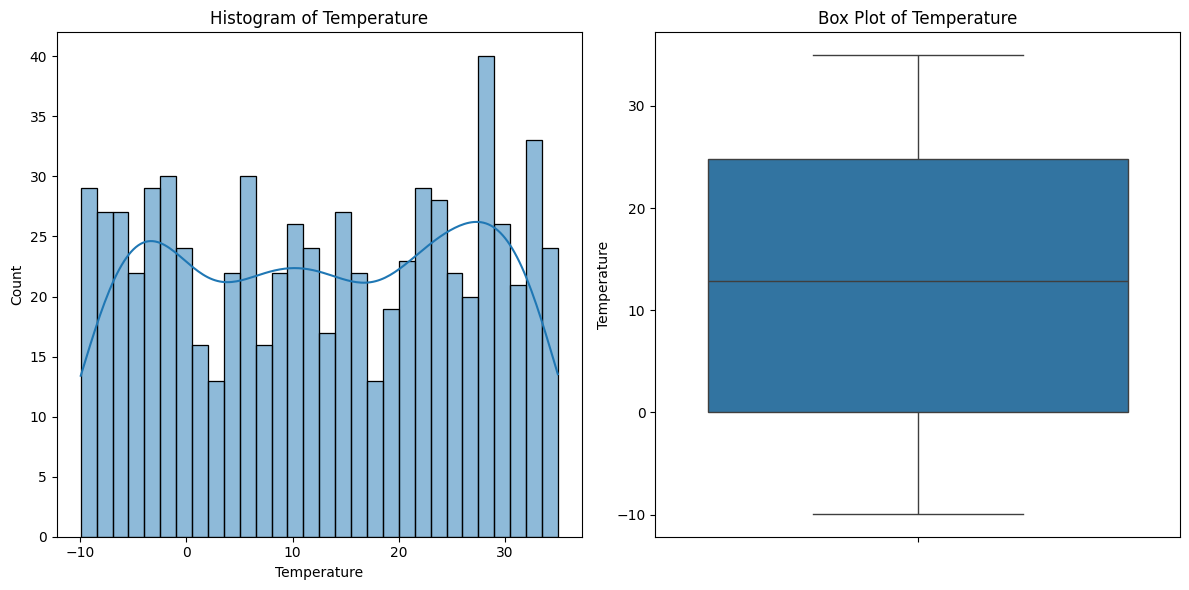

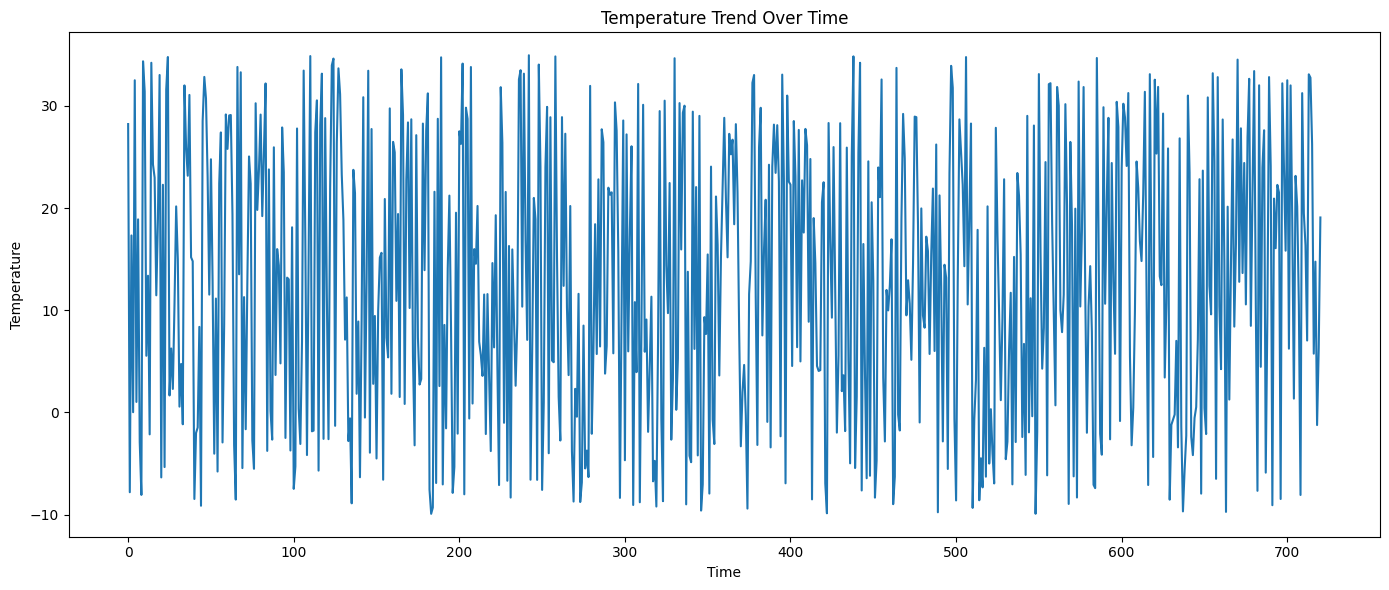

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_temperature_distribution(data):
    """Plot the histogram and box plot for the temperature feature."""
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['temperature'], bins=30, kde=True)
    plt.title('Histogram of Temperature')
    plt.xlabel('Temperature')

    # Box plot (vertical)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data['temperature'])
    plt.title('Box Plot of Temperature')
    plt.ylabel('Temperature')

    plt.tight_layout()
    plt.show()

def plot_temperature_trend_over_time(data):
    """Plot the temperature trend over time."""
    plt.figure(figsize=(14, 6))
    
    # Line plot of temperature over time
    sns.lineplot(x=data.index, y='temperature', data=data)
    plt.title('Temperature Trend Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature')

    plt.tight_layout()
    plt.show()

def main():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the temperature distribution
    plot_temperature_distribution(df)

    # Plot the temperature trend over time
    plot_temperature_trend_over_time(df)

if __name__ == "__main__":
    main()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


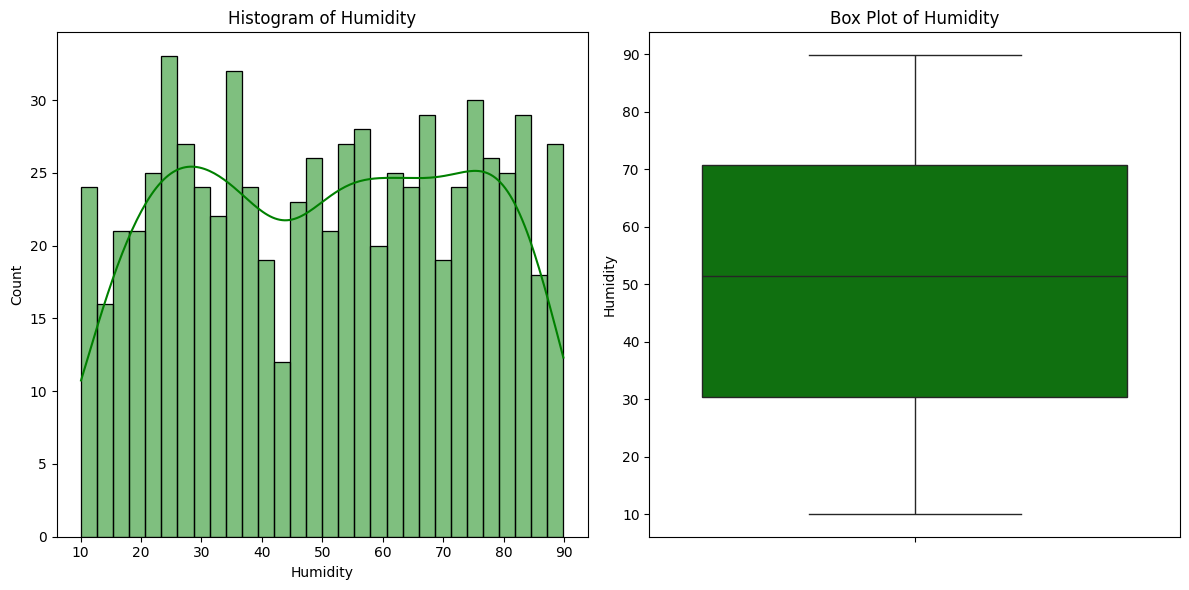

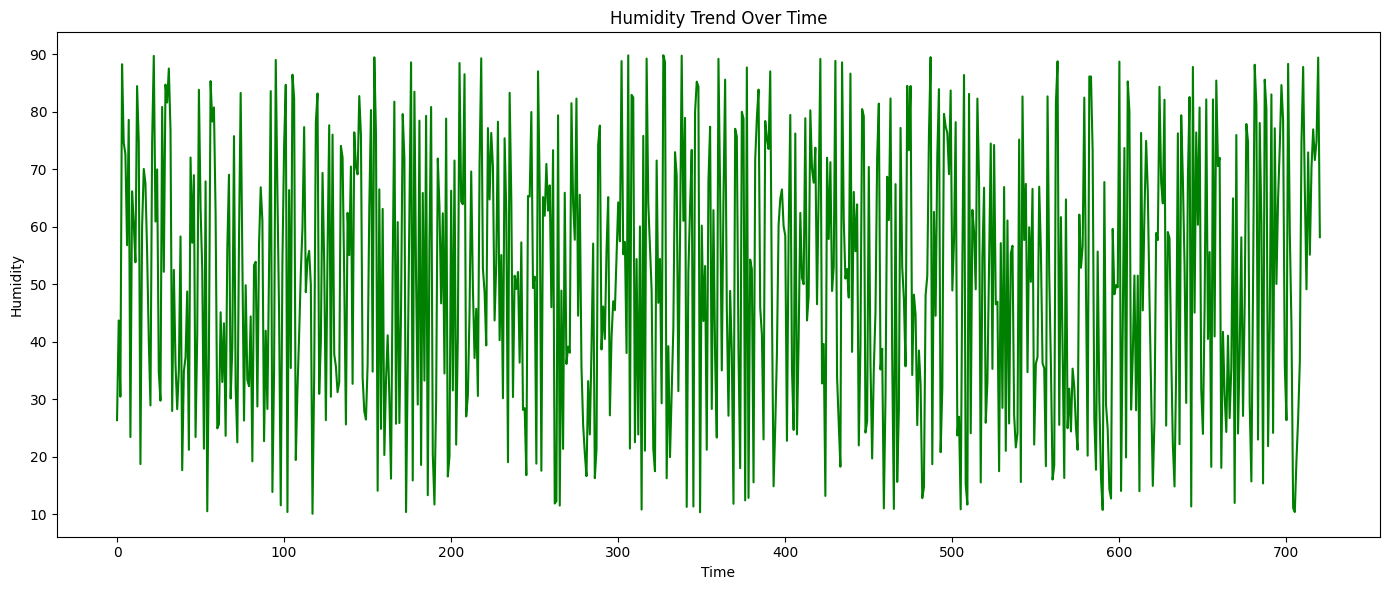

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_humidity_distribution(data):
    """Plot the histogram and box plot for the humidity feature."""
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['humidity'], bins=30, kde=True, color='green')
    plt.title('Histogram of Humidity')
    plt.xlabel('Humidity')

    # Box plot (vertical)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data['humidity'], color='green')
    plt.title('Box Plot of Humidity')
    plt.ylabel('Humidity')

    plt.tight_layout()
    plt.show()

def plot_humidity_trend_over_time(data):
    """Plot the humidity trend over time."""
    plt.figure(figsize=(14, 6))
    
    # Line plot of humidity over time
    sns.lineplot(x=data.index, y='humidity', data=data, color='green')
    plt.title('Humidity Trend Over Time')
    plt.xlabel('Time')
    plt.ylabel('Humidity')

    plt.tight_layout()
    plt.show()

def main_humidity_analysis():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the humidity distribution
    plot_humidity_distribution(df)

    # Plot the humidity trend over time
    plot_humidity_trend_over_time(df)

if __name__ == "__main__":
    main_humidity_analysis()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


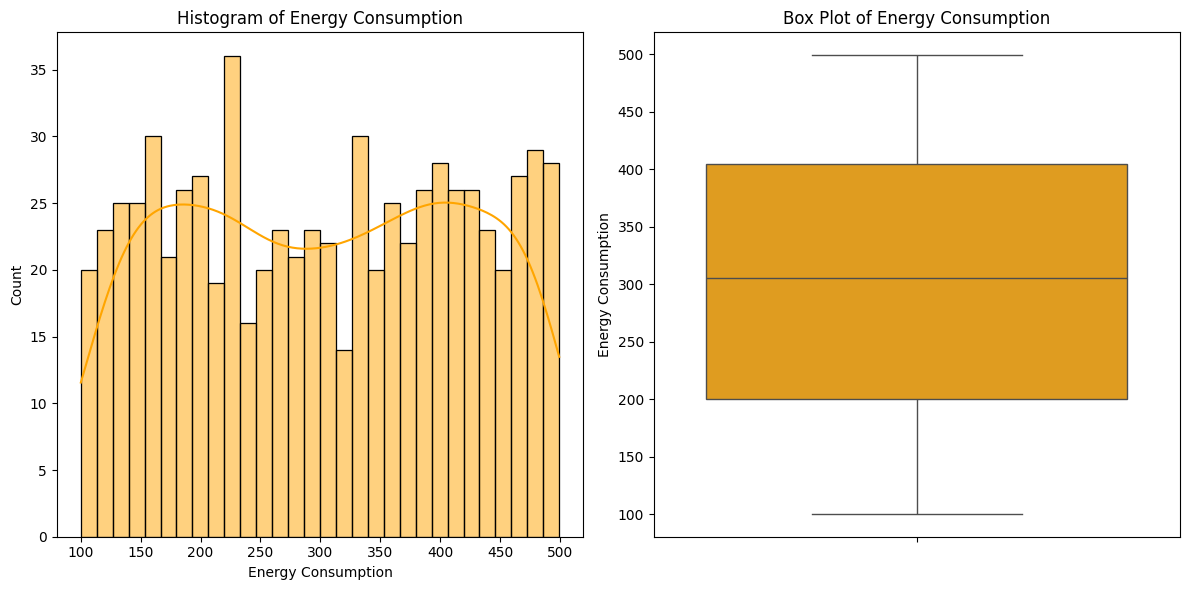

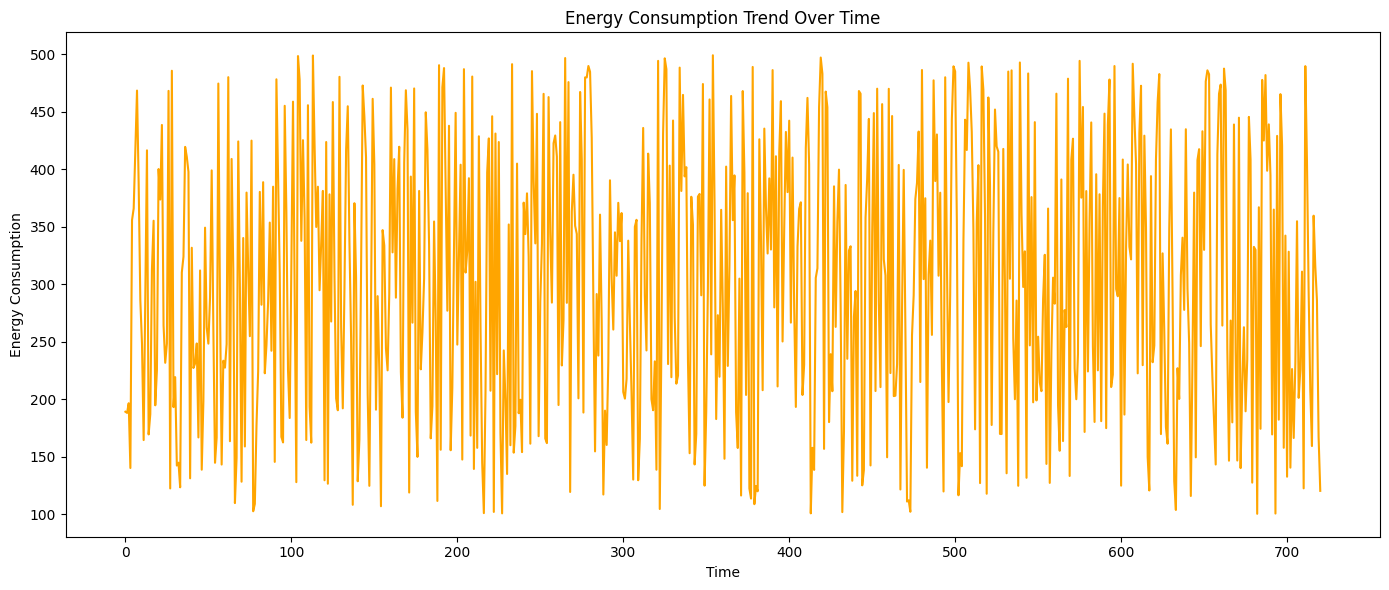

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_energy_consumption_distribution(data):
    """Plot the histogram and box plot for the energy consumption feature."""
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['energy_consumption'], bins=30, kde=True, color='orange')
    plt.title('Histogram of Energy Consumption')
    plt.xlabel('Energy Consumption')

    # Box plot (vertical)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data['energy_consumption'], color='orange')
    plt.title('Box Plot of Energy Consumption')
    plt.ylabel('Energy Consumption')

    plt.tight_layout()
    plt.show()

def plot_energy_consumption_trend_over_time(data):
    """Plot the energy consumption trend over time."""
    plt.figure(figsize=(14, 6))
    
    # Line plot of energy consumption over time
    sns.lineplot(x=data.index, y='energy_consumption', data=data, color='orange')
    plt.title('Energy Consumption Trend Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')

    plt.tight_layout()
    plt.show()

def main_energy_consumption_analysis():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the energy consumption distribution
    plot_energy_consumption_distribution(df)

    # Plot the energy consumption trend over time
    plot_energy_consumption_trend_over_time(df)

if __name__ == "__main__":
    main_energy_consumption_analysis()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


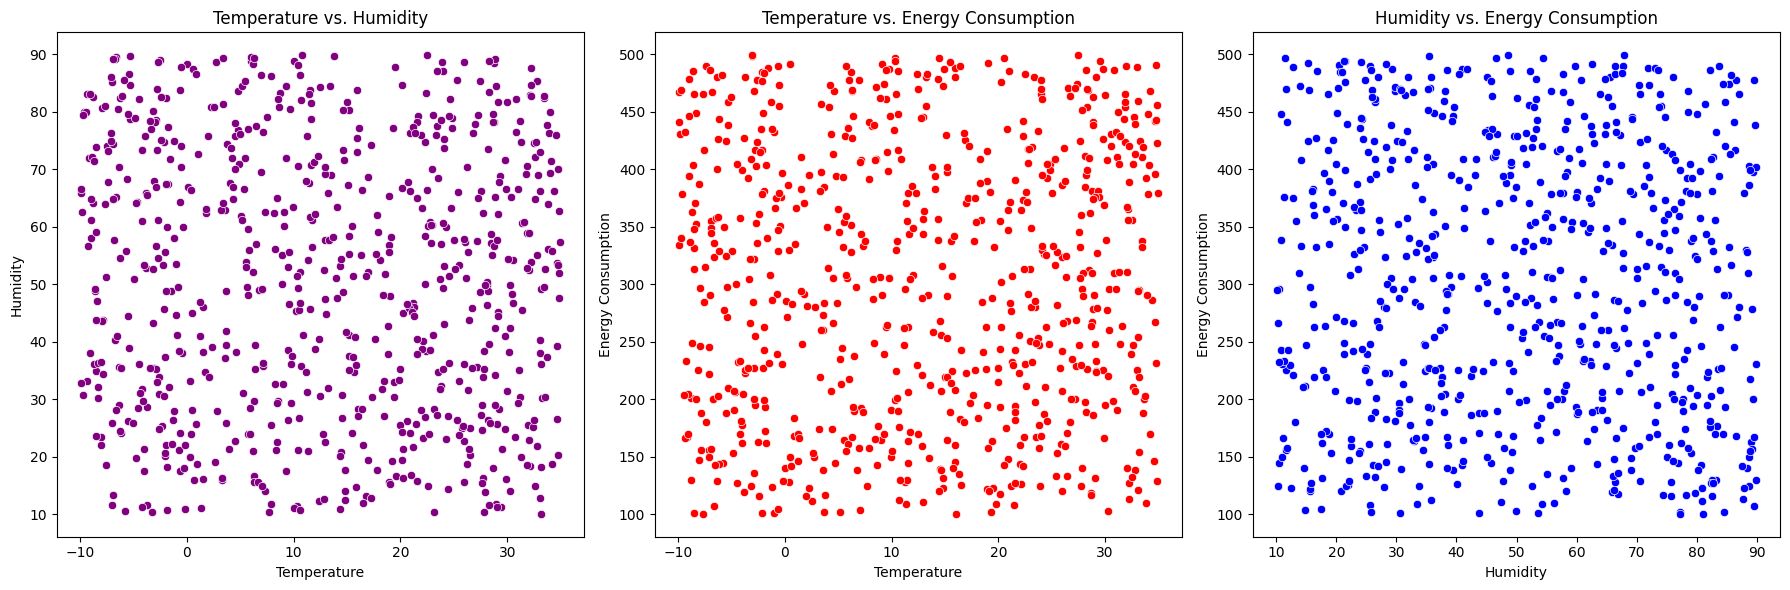

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_scatter_relationships(data):
    """Plot scatter plots for the relationships between temperature, humidity, and energy consumption."""
    plt.figure(figsize=(18, 6))

    # Scatter plot for temperature vs. humidity
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='temperature', y='humidity', data=data, color='purple')
    plt.title('Temperature vs. Humidity')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')

    # Scatter plot for temperature vs. energy consumption
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='temperature', y='energy_consumption', data=data, color='red')
    plt.title('Temperature vs. Energy Consumption')
    plt.xlabel('Temperature')
    plt.ylabel('Energy Consumption')

    # Scatter plot for humidity vs. energy consumption
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='humidity', y='energy_consumption', data=data, color='blue')
    plt.title('Humidity vs. Energy Consumption')
    plt.xlabel('Humidity')
    plt.ylabel('Energy Consumption')

    plt.tight_layout()
    plt.show()

def main_scatter_plots():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the scatter relationships between temperature, humidity, and energy consumption
    plot_scatter_relationships(df)

if __name__ == "__main__":
    main_scatter_plots()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


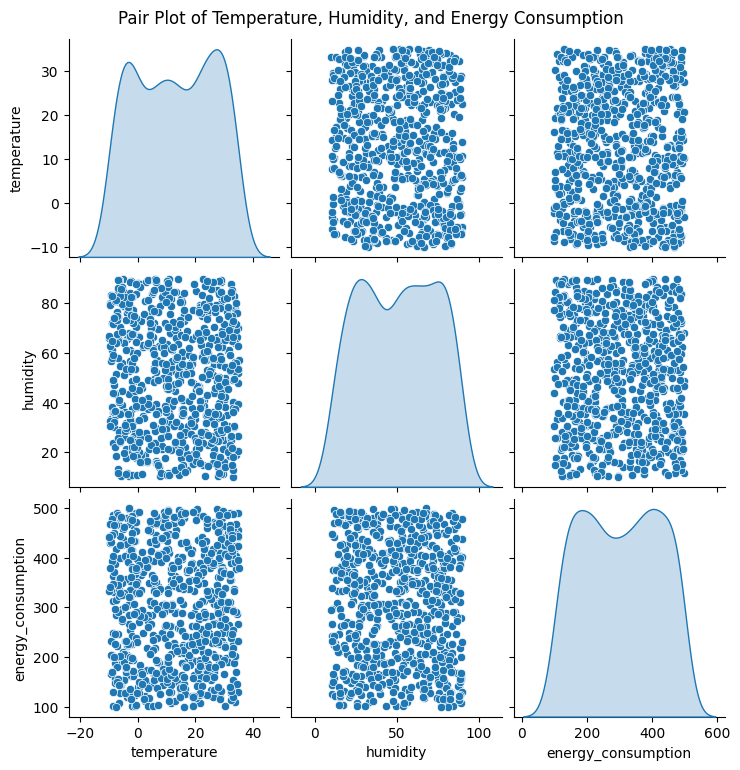

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_pair_plot(data):
    """Plot a pair plot for temperature, humidity, and energy consumption."""
    sns.pairplot(data, vars=['temperature', 'humidity', 'energy_consumption'], kind='scatter', diag_kind='kde')
    plt.suptitle('Pair Plot of Temperature, Humidity, and Energy Consumption', y=1.02)
    plt.show()

def main_pair_plot():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the pair plot
    plot_pair_plot(df)

if __name__ == "__main__":
    main_pair_plot()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


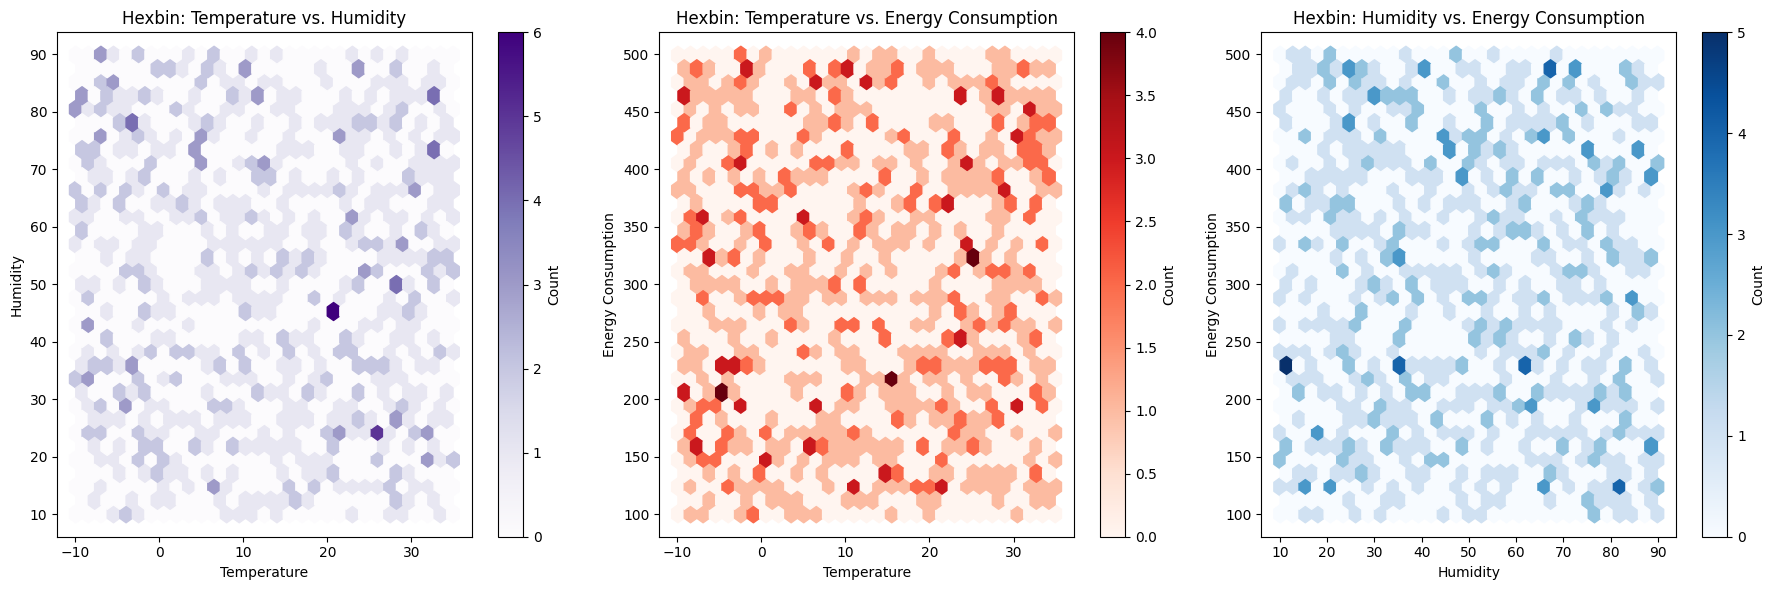

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_hexbin_relationships(data):
    """Plot hexbin plots for the relationships between temperature, humidity, and energy consumption."""
    plt.figure(figsize=(18, 6))

    # Hexbin plot for temperature vs. humidity
    plt.subplot(1, 3, 1)
    plt.hexbin(data['temperature'], data['humidity'], gridsize=30, cmap='Purples')
    plt.colorbar(label='Count')
    plt.title('Hexbin: Temperature vs. Humidity')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')

    # Hexbin plot for temperature vs. energy consumption
    plt.subplot(1, 3, 2)
    plt.hexbin(data['temperature'], data['energy_consumption'], gridsize=30, cmap='Reds')
    plt.colorbar(label='Count')
    plt.title('Hexbin: Temperature vs. Energy Consumption')
    plt.xlabel('Temperature')
    plt.ylabel('Energy Consumption')

    # Hexbin plot for humidity vs. energy consumption
    plt.subplot(1, 3, 3)
    plt.hexbin(data['humidity'], data['energy_consumption'], gridsize=30, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title('Hexbin: Humidity vs. Energy Consumption')
    plt.xlabel('Humidity')
    plt.ylabel('Energy Consumption')

    plt.tight_layout()
    plt.show()

def main_hexbin_plots():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the hexbin relationships between temperature, humidity, and energy consumption
    plot_hexbin_relationships(df)

if __name__ == "__main__":
    main_hexbin_plots()


DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271


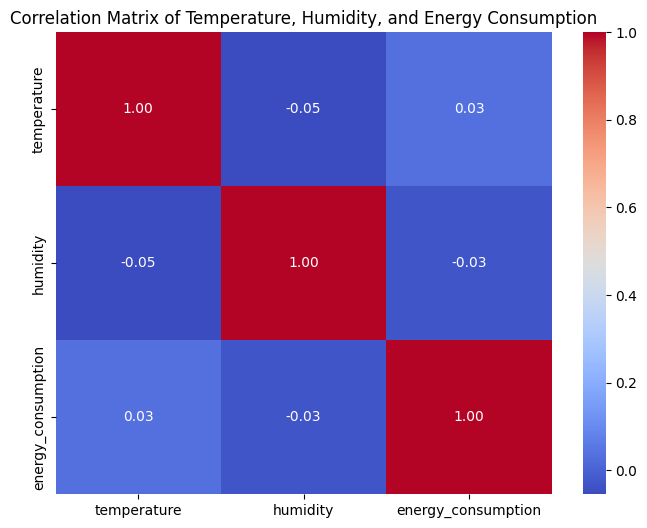

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from", file_name)
    return df_cleaned

def plot_correlation_heatmap(data):
    """Plot a heatmap showing the correlation matrix for temperature, humidity, and energy consumption."""
    correlation_matrix = data[['temperature', 'humidity', 'energy_consumption']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Temperature, Humidity, and Energy Consumption')
    plt.show()

def main_heatmap():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())

    # Plot the correlation heatmap
    plot_correlation_heatmap(df)

if __name__ == "__main__":
    main_heatmap()


### Select Performance Metric

DataFrame loaded from df_cleaned.csv

First few rows of the cleaned dataset:


,timestamp,temperature,humidity,energy_consumption
0,2023-01-01 00:00:00,28.222915,26.374678,188.996850
1,2023-01-01 01:00:00,-7.815168,43.713180,187.986857
2,2023-01-01 02:00:00,17.319632,30.460580,196.385911
3,2023-01-01 03:00:00,0.017217,88.303058,140.063990
4,2023-01-01 04:00:00,32.509077,74.616157,355.671271



Basic Statistics of the Target Variable:
count    721.000000
mean     302.535422
std      117.288715
min      100.243083
25%      199.866311
50%      304.879252
75%      404.753109
max      498.978089
Name: energy_consumption, dtype: float64

Skewness of energy_consumption: -0.01264206708241907
Kurtosis of energy_consumption: -1.263894688570791


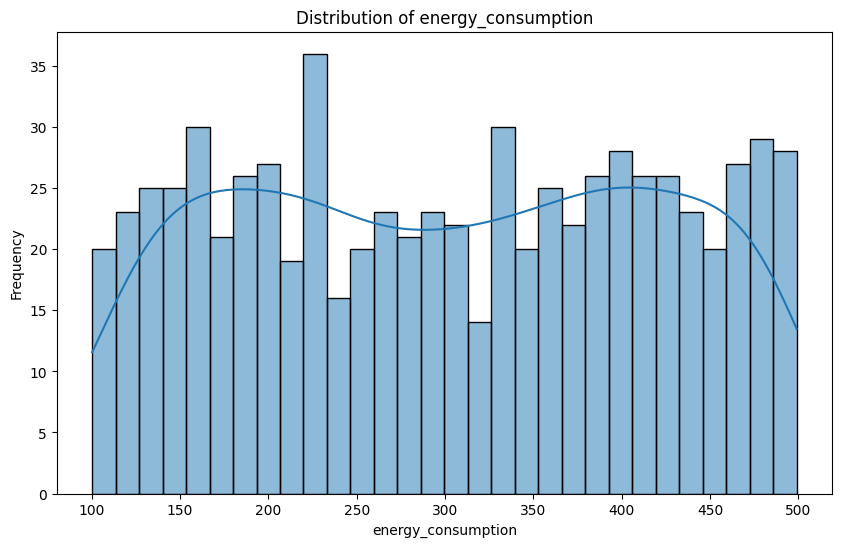


Selected Performance Metric: RMSE
Justification: The distribution is nearly symmetric with light tails, indicating that RMSE is a suitable performance metric as it emphasizes larger errors, which might be relevant if larger deviations in energy consumption are particularly undesirable.


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

def load_cleaned_dataframe(file_name):
    """Load the cleaned DataFrame from a CSV file."""
    df_cleaned = pd.read_csv(file_name)
    print(f"DataFrame loaded from {file_name}")
    return df_cleaned

def analyze_target_variable(df, target_column):
    """Analyze the target variable to inform performance metric selection."""
    # Basic statistics of the target variable
    target_stats = df[target_column].describe()
    print("\nBasic Statistics of the Target Variable:")
    print(target_stats)

    # Skewness and Kurtosis
    skewness = df[target_column].skew()
    kurtosis = df[target_column].kurt()
    print(f"\nSkewness of {target_column}: {skewness}")
    print(f"Kurtosis of {target_column}: {kurtosis}")

    # Distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target_column], kde=True, bins=30)
    plt.title(f'Distribution of {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Frequency')
    plt.show()

    # Heuristic for selecting performance metric
    if skewness < 0.5 and kurtosis < 0:
        metric = "RMSE"
        justification = ("The distribution is nearly symmetric with light tails, "
                         "indicating that RMSE is a suitable performance metric "
                         "as it emphasizes larger errors, which might be relevant "
                         "if larger deviations in energy consumption are particularly undesirable.")
    else:
        metric = "MAE"
        justification = ("The distribution has notable skewness or heavier tails, "
                         "making MAE more appropriate as it treats all errors equally "
                         "and is more robust to outliers.")

    print(f"\nSelected Performance Metric: {metric}")
    print(f"Justification: {justification}")

def main():
    # Load the cleaned DataFrame back into memory for feature engineering
    df = load_cleaned_dataframe('df_cleaned.csv')
    
    # Show the first few rows of the cleaned dataset for inspection
    print("\nFirst few rows of the cleaned dataset:")
    display(df.head())
    
    # Analyze the target variable to justify the selection of the performance metric
    analyze_target_variable(df, 'energy_consumption')

if __name__ == "__main__":
    main()
